In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
volume_df = pd.read_csv('../../data/Old_Data/Music_Sales_Volume_Data.csv')

## Early analysis with old data.

In [3]:
volume_df.shape
volume_nrows = volume_df.shape[0]
volume_ncols = volume_df.shape[1]

volume_nrows, volume_ncols = volume_df.shape

print(f'There are {volume_nrows} rows and {volume_ncols} columns in the Music Sales (Volume) data frame')

There are 261 rows and 16 columns in the Music Sales (Volume) data frame


In [4]:
volume_df

,Year of Year Date,Format,Format (copy),Metric,Value (Actual),Adjusted for Inflation Flag,Year,Year Date,% of Total Volume,Format Value # (Billion),Format Value # (Million),Total Value # (Billion),Total Value # (Million),Total Value For Year,Value (Actual) (copy),Year (copy)
0,2000,CD,CD,Units,942.500000,NaN,2000,2000,87.3%,NaN,$942.5M,1.1B,NaN,$1079.2B,$943M,2000
1,2001,CD,CD,Units,881.900000,NaN,2001,2001,91.1%,NaN,$881.9M,NaN,$968.5M,$968.5B,$882M,2001
2,2002,CD,CD,Units,803.300000,NaN,2002,2002,93.4%,NaN,$803.3M,NaN,$859.7M,$859.7B,$803M,2002
3,2003,CD,CD,Units,746.000000,NaN,2003,2003,93.4%,NaN,$746.0M,NaN,$798.4M,$798.4B,$746M,2003
4,2004,CD,CD,Units,767.000000,NaN,2004,2004,80.1%,NaN,$767.0M,NaN,$958.1M,$958.1B,$767M,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2015,Ringtones & Ringbacks,Ringtones & Ringbacks,Units,21.924866,NaN,2015,2015,1.7%,NaN,$21.9M,1.3B,NaN,$1255.5B,$22M,2015
257,2016,Ringtones & Ringbacks,Ringtones & Ringbacks,Units,22.620785,NaN,2016,2016,2.3%,NaN,$22.6M,NaN,$970.1M,$970.1B,$23M,2016
258,2017,Ringtones & Ringbacks,Ringtones & Ringbacks,Units,14.262870,NaN,2017,2017,1.9%,NaN,$14.3M,NaN,$742.6M,$742.6B,$14M,2017
259,2018,Ringtones & Ringbacks,Ringtones & Ringbacks,Units,10.026287,NaN,2018,2018,1.9%,NaN,$10.0M,NaN,$532.3M,$532.3B,$10M,2018


In [5]:
volume_df.columns

Index(['Year of Year Date', 'Format', 'Format (copy)', 'Metric',
       'Value (Actual)', 'Adjusted for Inflation Flag', 'Year', 'Year Date',
       '% of Total Volume', 'Format Value # (Billion)',
       'Format Value # (Million)', 'Total Value # (Billion)',
       'Total Value # (Million)', 'Total Value For Year',
       'Value (Actual) (copy)', 'Year (copy)'],
      dtype='object')

### Observations

* Names of the columns are repeated, some need to be renamed. 
* Need to clean up data in terms of columns. 
* The rows seem to be related to format, shows different formats and the year they were sold. 
* When cleaning up data, delete columns 'Year of Year Date','Format (copy)', 'Value(Actual)' (will probably be easier to use the values in Value(Actual)(Copy), and 'Year (copy)'.

In [6]:
volume_df['Year'].value_counts()

2009    16
2010    16
2005    16
2006    16
2007    16
2008    16
2011    16
2004    13
2018    12
2019    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2003    11
2002    10
2001    10
2000     9
Name: Year, dtype: int64

### Observations

* This seems to be the number of music formats each year, it's interesting to see how the numbers change. It's noticeable that in the early 2000s there were less formats. Then there were a couple of years in which there could be a crossover, when old formats were still not obsolete but new formats were beginning to be used. Then in the later years the number of formats dips down again a little bit. 

In [7]:
volume_df['Format'].value_counts()

LP/EP                     20
Music Video (Physical)    20
CD Single                 20
CD                        20
Vinyl Single              20
DVD Audio                 19
SACD                      17
Download Album            16
Download Single           16
Kiosk                     15
Ringtones & Ringbacks     15
Download Music Video      15
Cassette                  12
Cassette Single           12
Other Tapes               12
8 - Track                 12
Name: Format, dtype: int64

In [8]:
cd_filter = volume_df['Format']=='CD'

cd_sales_df = volume_df[cd_filter]
cd_sales_df.shape

(20, 16)

In [9]:
cd_sales_df[['Year', 'Value (Actual)']].plot(   x='Year',
                                                y='Value (Actual)')

<AxesSubplot:xlabel='Year'>

<AxesSubplot:xlabel='Year'>

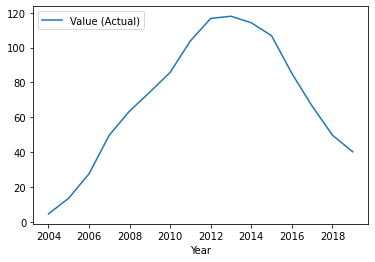

In [10]:
download_album_filter = volume_df['Format']=='Download Album'

download_album_sales_df = volume_df[download_album_filter]
download_album_sales_df.shape
download_album_sales_df[['Year', 'Value (Actual)']].plot(   x='Year',
                                                y='Value (Actual)')

<AxesSubplot:xlabel='Year'>

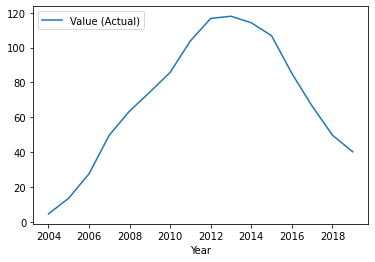

In [11]:
download_single_filter = volume_df['Format']=='Download Single'

download_single_sales_df = volume_df[download_album_filter]
download_single_sales_df.shape
download_single_sales_df[['Year', 'Value (Actual)']].plot(   x='Year',
                                                y='Value (Actual)')

### Observations

* There was a spike in sales that were digital in nature in the 2010s, however, sales are still on the decrease overall 
* Other formats such as CDs are decreasing dramatically in sales
* I'm thinking the decrease in sales, even digital, may be due to a rise in streaming services. Streaming doesn't seem to be included in this chart, perhaps because streams don't constitute as sales. 

Maybe I should look for streaming data and see how that has changed music consumption instead of comparing sales in volume vs. revenue?